In [6]:
# 1. Importing Python Modules/Libraries.
import pandas as pd

In [7]:
# 2. Importing data. Displaying data.
df = pd.read_csv("datasets/diabetes.csv")

In [8]:
# 3. Statistical analysis & Outlier analysis.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

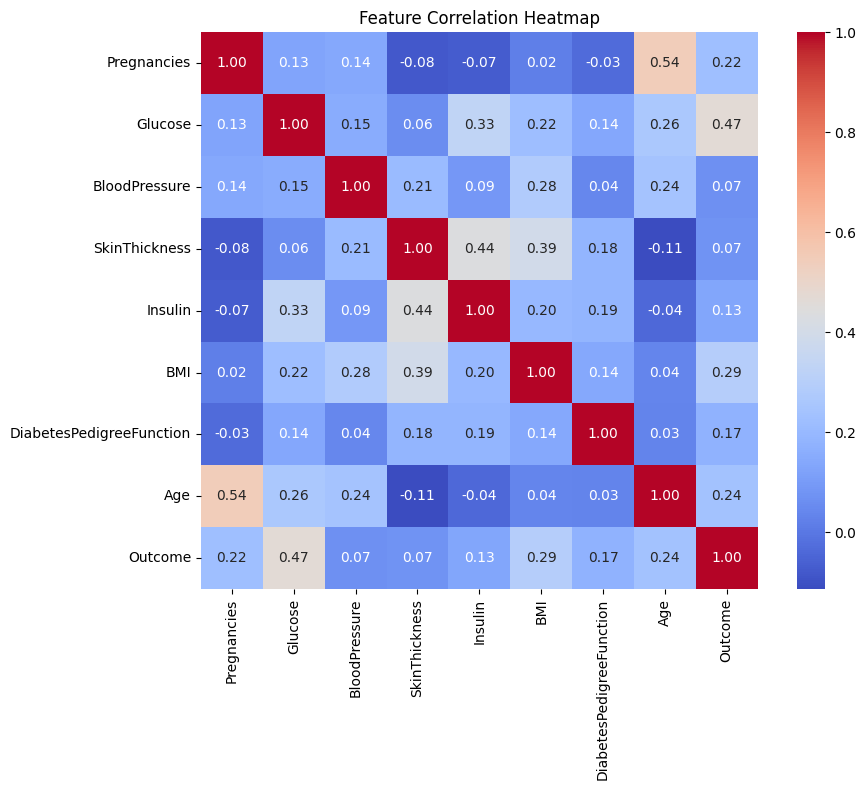

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [19]:
# Distribution of each feature by Outcome
#fig, axes = plt.subplots(2, 4, figsize=(16, 8))
#features = df.columns[:-1]
#for idx, col in enumerate(features):
#    ax = axes[idx // 4, idx % 4]
#    df[df['Outcome'] == 0][col].hist(ax=ax, bins=20, alpha=0.6, label='No Diabetes', color='steelblue')
#    df[df['Outcome'] == 1][col].hist(ax=ax, bins=20, alpha=0.6, label='Diabetes', color='salmon')
#    ax.set_title(col)
#    ax.legend(fontsize=7)
#
#plt.suptitle("Feature Distributions by Outcome", fontsize=14)
#plt.tight_layout()
#plt.show()

In [12]:
# 5. Replacing missing value with meaningful value.
df.fillna(df.mean(numeric_only=True), inplace=True)

In [13]:
# 4. Creating the Independent and Dependent variables.
X = df.iloc[:, :-1]  # All columns except the last one (features)
y = df.iloc[:, -1]   # Last column (target/species)

In [14]:
from sklearn.model_selection import train_test_split

# 6. Splitting the data into training and test set

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 614
Test set size: 154


In [15]:
# 7. Apply KNN and check its performance.
# References:
# https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbours/
# https://github.com/mavaladezt/kNN-from-Scratch/blob/master/knn.py
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Check performance
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

KNN Accuracy: 0.6494

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.71        99
           1       0.51      0.64      0.56        55

    accuracy                           0.65       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.65      0.66       154


Confusion Matrix:
[[65 34]
 [20 35]]


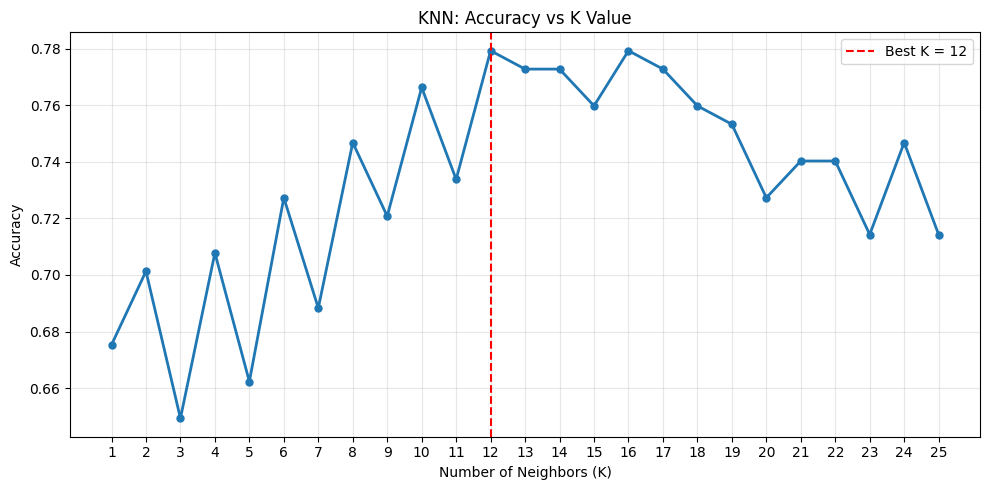

Best K = 12 with accuracy = 0.7792


In [16]:
# Finding optimal K value
from sklearn.metrics import accuracy_score
k_range = range(1, 26)
k_scores = []
for k in k_range:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    k_scores.append(accuracy_score(y_test, knn_k.predict(X_test)))

plt.figure(figsize=(10, 5))
plt.plot(k_range, k_scores, marker='o', linewidth=2, markersize=5)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs K Value')
plt.xticks(k_range)
plt.grid(True, alpha=0.3)
best_k = list(k_range)[k_scores.index(max(k_scores))]
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best K = {best_k}')
plt.legend()
plt.tight_layout()
plt.show()
print(f"Best K = {best_k} with accuracy = {max(k_scores):.4f}")

In [17]:
# 8. Apply NB and check its performance.
# References
# https://johnjdailey.medium.com/naive-bayes-classifier-built-in-python-with-numpy-9f05ec26e373
# https://www.kaggle.com/code/pratikgarai/naive-bayes-classifier-from-scratch-using-numpy

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)

# Check performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7662

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154


Confusion Matrix:
[[79 20]
 [16 39]]


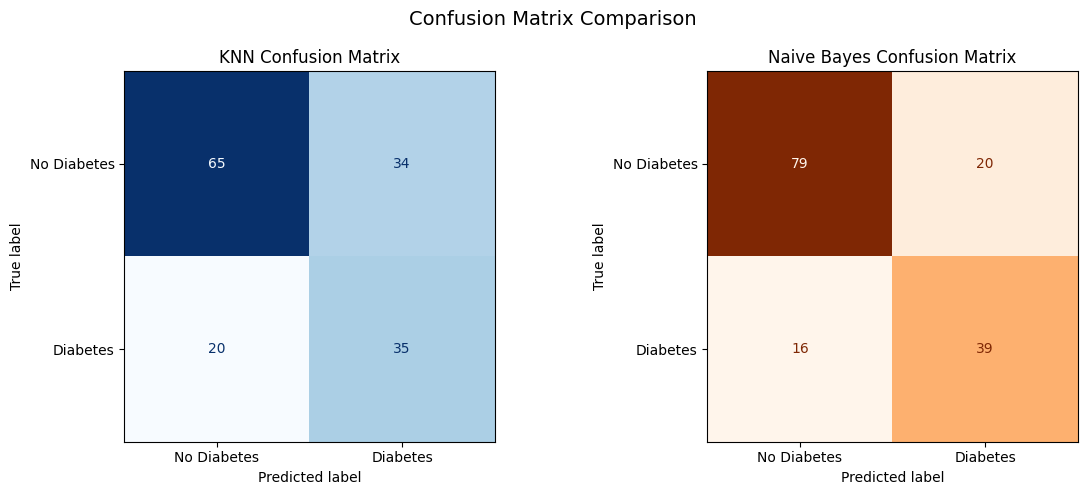

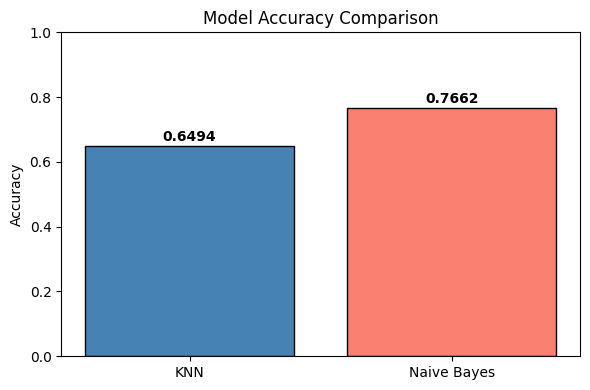

In [18]:
# 9. Comparison of KNN vs Naive Bayes
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KNN Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, display_labels=["No Diabetes", "Diabetes"],
                                      cmap='Blues', ax=axes[0], colorbar=False)
axes[0].set_title("KNN Confusion Matrix")

# Naive Bayes Confusion Matrix
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test, display_labels=["No Diabetes", "Diabetes"],
                                      cmap='Oranges', ax=axes[1], colorbar=False)
axes[1].set_title("Naive Bayes Confusion Matrix")

plt.suptitle("Confusion Matrix Comparison", fontsize=14)
plt.tight_layout()
plt.show()

# Accuracy comparison bar chart
models = ['KNN', 'Naive Bayes']
accuracies = [accuracy, accuracy_nb]

plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=['steelblue', 'salmon'], edgecolor='black')
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.tight_layout()
plt.show()